### Exercise 5.7

Consider the integral

$I = \int_0^1 \sin^2 \sqrt{100 x} dx$

1. Write a program that uses the adaptive trapezoidal rule method of Section 5.3 and Eq. (5.34) to calculate the value of this integral to an approximate accuracy of $\epsilon=10^{-6}$ (i.e.,correct to six digits after the decimal point). Start with one single integration slice and  work up from there to two, four, eight, and so forth.  Have your program
  print out the number of slices, its estimate of the integral, and its  estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. (Hint: You should find the result is around $I=0.45$.)
2. Now modify your program to evaluate the same integral using the Romberg integration technique described in this section.  Have your program print out a triangular table of values, as on page~161, of all the Romberg estimates of the integral.  Calculate the error on your estimates using Eq.~(5.49) and again continue the calculation until you reach an accuracy of~$\epsilon=10^{-6}$.  You should find that the Romberg method reaches the required accuracy considerably faster than the trapezoidal rule alone.

In [30]:
from numpy import linspace,sum,sin,sqrt
from __future__ import division
from scipy.integrate import quad

def trapezoidal(f,a,b,N,adapt=False):
    """
    Reference implementation. Note the function handle, f
    INPUTS:
    f = function handle
    a = lower limit on integration
    b = upper limit on integration
    N = number of trapezoids to sum over.
    """
    x = linspace(a,b,N+1) 
    h = (b-a) / N
    if not adapt:
        fx = f(x)           # Evaluate all the function values at one time. Faster.
        return h*(sum(fx[1:-1])+(fx[0]+fx[-1])/2.)  # Use formula to compute solution
    else:
        fx = f(x[1:-1:2]) # only the odd terms, no first, no last
        return h * sum(fx)
    
def addaptive_trap(f,a,b, N = 10, err=1e-6):
    err_i = 1
    I_im1 = trapezoidal(f,a,b,N)
    while err_i > err:
        N = N * 2
        I_i = .5 * I_im1 + trapezoidal(f,a,b,N,adapt=True)
        err_i = 1/3 * abs(I_i-I_im1)
        I_im1 = I_i
    return I_i,err_i,N

f = lambda x: sin(sqrt(100*x))**2


print addaptive_trap(f,0,1,err=1e-13)
#print trapezoidal(f,0,1,655360)
print quad(f,0,1,epsrel=1e-16)

(0.45583253230901299, 7.234953377140603e-14, 10485760)
(0.4558325323090851, 1.0330117294415753e-10)


In [17]:
from numpy import empty

def findError(R,i):
    m = i
    return abs(1/(4**m -1)*(R[i,m] - R[i-1,m]))

def rhomberg(f,a,b,N=10,err_tol=1e-6):
    R = empty((500,500))
    R[0,0] = trapezoidal(f,a,b,N)
    N *= 2
    R[1,0] = 1/2 * R[0,0] + trapezoidal(f,a,b,N, adapt=True)
    R[1,1] = R[1,0] + 1/3*(R[1,0] - R[0,0])
    i = 1
    while findError(R,i) > err_tol:
        N*=2
        i+=1
        R[i,0] = 1/2 * R[i-1,0] + trapezoidal(f,a,b,N,adapt=True)
        for m in range(1,i+1):
            R[i,m] = R[i,m-1] + 1 / (4**m-1) * (R[i,m-1] - R[i-1,m-1])
        #print R[i,:m]
    return R[i,i],findError(R,i)

print rhomberg(f,0,1,err_tol=1e-13)
print quad(f,0,1,epsrel=1e-16)

(0.45583253230908444, 2.5911079564429563e-14)
(0.4558325323090851, 1.0330117294415753e-10)


### Exercise 5.9: Heat capacity of a solid

Debye's theory of solids gives the heat capacity of a solid at temperature $T$ to be

$C_V = 9V\rho k_B \biggl( {T\over\theta_D} \biggr)^3 \int_0^{\theta_D/T}{x^4 e^x\over(e^x-1)^2}dx$,

where $V$ is the volume of the solid, $\rho$ is the number density of atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the so-called *Debye temperature*, a property of solids that depends on their density and speed of sound.

1. Write a Python function **cv(T)** that calculates $C_V$ for a given value of the temperature, for a sample consisting of 1000 cubic centimeters of solid aluminum, which has a number density of $\rho=6.022\times10^{28}\,\mathrm{m}^{-3}$ and a Debye temperature of $\theta_D=428\,$K.  Use Gaussian quadrature to evaluate the integral, with $N=50$ sample points.
2. Use your function to make a graph of the heat capacity as a function of temperature from $T=5\,$K to $T=500\,$K.

For this problem, do not use the textbook's Gaussian quadrature funtion. Instead, use the functions from [scipy](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.fixed_quad.html#scipy.integrate.fixed_quad) that integrate using Gaussian quadrature. 

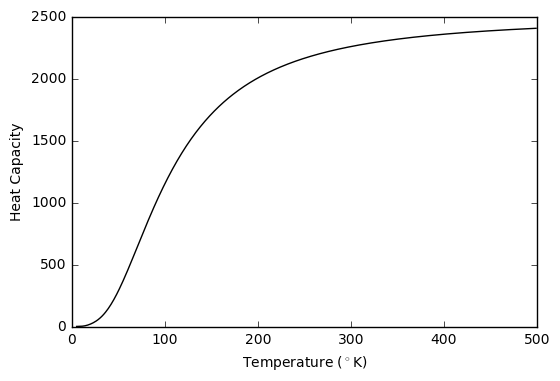

In [28]:
from pylab import plot,exp,show,xlabel,ylabel
from scipy.integrate import fixed_quad

def Cv(T):
    fi = lambda x: x**4*exp(x) / (exp(x)-1)**2
    rho = 6.022e28
    theta_d = 428
    kb = 1.38064852e-23
    V = 0.001
    integral,err = fixed_quad(fi,0,theta_d/T)
    return 9*V*rho*kb*(T/theta_d)**3*integral

C = []
temps = range(5,500)
for T in temps:
    C.append(Cv(T))
    
plot(temps,C,'k-')
xlabel(r"Temperature ($^\circ$K)")
ylabel(r"Heat Capacity")
show()